In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nishanikasineshan","key":"4425a83486cdf10e8e202235a42d5e25"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 25.0MB/s]


In [7]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [23]:
#import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics # scikit-learn metrics module for computing accuracy

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

In [9]:
#loading dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head() # Preview the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_df.shape # Number of instances and variables

(768, 9)

In [11]:
#rename columns
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label'] # Define new column names
diabetes_df.columns = col_names # Rename column names

In [12]:
diabetes_df.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [14]:
#dataset summary
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
#freq distributions of values in variables
for col in col_names:
  print(diabetes_df[col].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnant, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: bp, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     

In [16]:
#exploring target variable
diabetes_df['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [17]:
#check for missing values in variables
diabetes_df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [18]:
#define feature vector and target variable
X = diabetes_df.drop(['label'], axis=1) # Drop the target variable
y = diabetes_df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((576, 8), (192, 8))

Feature Engineering : encoding categorical variables

In [20]:
X_train.dtypes # Check data types in X_train

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
dtype: object

In [27]:
encoder = OrdinalEncoder()

X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [35]:
DTC=DecisionTreeClassifier()

In [28]:
#building decision tree classifier with cini index criterion
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)#create decision tree classifier object
clf_gini.fit(X_train,y_train)#train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

In [29]:
y_pred=clf_gini.predict(X_test)

In [30]:
#evaluating the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71875


In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

<Axes: >

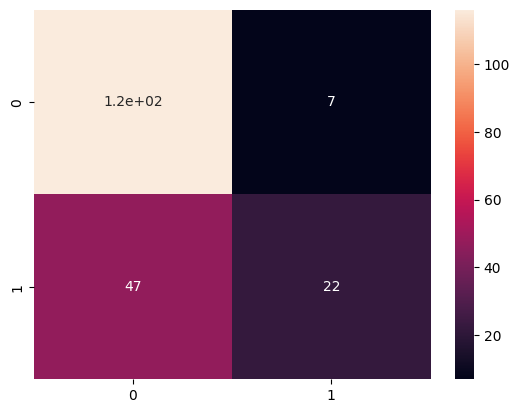

In [32]:
import seaborn as sns
sns.heatmap(conf_mat,annot=True)

In [33]:
from sklearn.model_selection import GridSearchCV

In [47]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12],
    'splitter':['best','random']
}

In [48]:
clf_GS=GridSearchCV(DTC,params)
clf_GS.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'splitter': ['best', 'random']})

In [49]:
clf_GS.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}

In [50]:
#building decision tree classifier with cini index criterion
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='random',random_state=0)#create decision tree classifier object
clf_gini.fit(X_train,y_train)#train the cla//ssifier

DecisionTreeClassifier(max_depth=2, random_state=0, splitter='random')

In [51]:
y_pred=clf_gini.predict(X_test)

In [52]:
#evaluating the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6510416666666666


In [53]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

<Axes: >

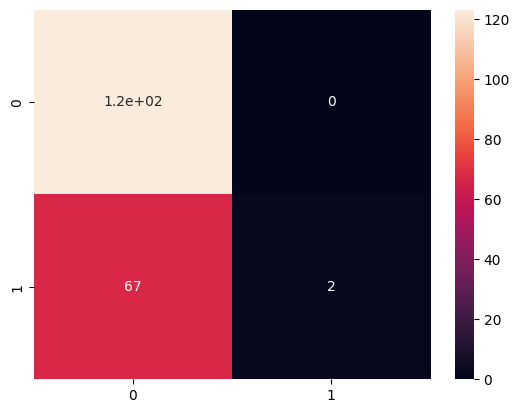

In [54]:
import seaborn as sns
sns.heatmap(conf_mat,annot=True)

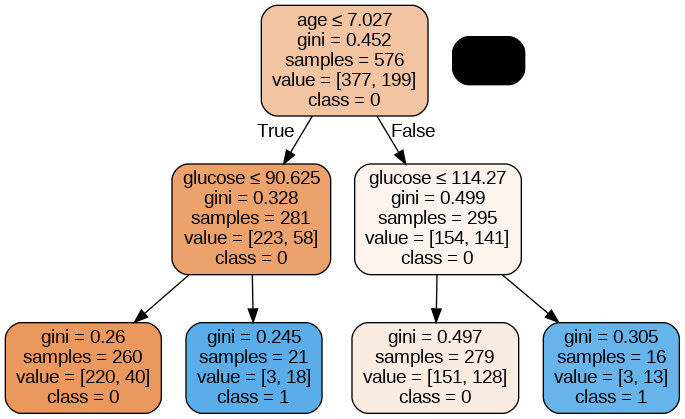

In [55]:
#visualizing decision trees
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       123
           1       1.00      0.03      0.06        69

    accuracy                           0.65       192
   macro avg       0.82      0.51      0.42       192
weighted avg       0.77      0.65      0.52       192

